# MBTI Personality Prediction

## 1. Data Loading and Cleaning

Load the MBTI dataset, handle missing values, remove duplicates, and apply preprocessing.

In [54]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path for importing project modules
sys.path.insert(0, os.path.abspath('../src'))

from preprocessor import TextPreprocessor
from utils import encode_mbti, decode_mbti, VALID_MBTI_TYPES

# Set display options
pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [55]:
# Load the dataset
DATA_PATH = '../data/mbti_1.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: Dataset not found at {DATA_PATH}")
    print("Please download the dataset from Kaggle and place it in the data/ folder.")
    print("See data/README.md for download instructions.")

Dataset loaded successfully!
Shape: (8675, 2)


In [56]:
# Initial data inspection
print("Dataset Info:")
print("=" * 50)
df.info()
print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB

First few rows:


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1ro...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the sam...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I kno..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of th..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to b...


In [57]:
# Check for missing values
print("Missing Values:")
print("=" * 50)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")

Missing Values:
type     0
posts    0
dtype: int64

Total missing values: 0


In [58]:
# Check for duplicates
print("Duplicate Analysis:")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate posts (same text, possibly different type)
duplicate_posts = df['posts'].duplicated().sum()
print(f"Number of duplicate posts: {duplicate_posts}")

Duplicate Analysis:
Number of duplicate rows: 0
Number of duplicate posts: 0


In [59]:
# Handle missing values and duplicates
print("Data Cleaning:")
print("=" * 50)

original_shape = df.shape[0]

# Drop rows with missing values
df = df.dropna()
after_na = df.shape[0]
print(f"Rows after dropping NA: {after_na} (removed {original_shape - after_na})")

# Drop duplicate rows
df = df.drop_duplicates()
after_dup = df.shape[0]
print(f"Rows after dropping duplicates: {after_dup} (removed {after_na - after_dup})")

# Validate MBTI types
invalid_types = df[~df['type'].isin(VALID_MBTI_TYPES)]
if len(invalid_types) > 0:
    print(f"\nWarning: Found {len(invalid_types)} rows with invalid MBTI types")
    print(invalid_types['type'].unique())
    df = df[df['type'].isin(VALID_MBTI_TYPES)]
else:
    print("\nAll MBTI types are valid.")

print(f"\nFinal dataset shape: {df.shape}")

Data Cleaning:
Rows after dropping NA: 8675 (removed 0)
Rows after dropping duplicates: 8675 (removed 0)

All MBTI types are valid.

Final dataset shape: (8675, 2)


In [60]:
# Apply text preprocessing
print("Applying text preprocessing...")
print("=" * 50)

preprocessor = TextPreprocessor()

# Preprocess all posts
df['posts_clean'] = df['posts'].apply(preprocessor.preprocess_posts)

# Show example of preprocessing
print("\nExample of preprocessing:")
print("\nOriginal (first 500 chars):")
print(df['posts'].iloc[0][:500])
print("\nCleaned (first 500 chars):")
print(df['posts_clean'].iloc[0][:500])

Applying text preprocessing...

Example of preprocessing:

Original (first 500 chars):
'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thin

Cleaned (first 500 chars):
' and moments sportscenter not top ten plays pranks what has been the most life-changing experience in your life? on repeat for most of today. may the perc experience immerse you. the last thing my friend posted on his facebook before committing suicide the next day. rest in peace hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection

In [61]:
# Create binary labels for each MBTI dimension
print("Creating binary labels for each dimension...")
print("=" * 50)

# Apply encoding to create binary columns
encoded = df['type'].apply(encode_mbti)

# Extract each dimension into separate columns
df['IE'] = encoded.apply(lambda x: x['IE'])  # 0=Introvert, 1=Extrovert
df['NS'] = encoded.apply(lambda x: x['NS'])  # 0=Intuitive, 1=Sensing
df['TF'] = encoded.apply(lambda x: x['TF'])  # 0=Thinking, 1=Feeling
df['JP'] = encoded.apply(lambda x: x['JP'])  # 0=Judging, 1=Perceiving

print("\nBinary encoding scheme:")
print("IE: 0=Introvert, 1=Extrovert")
print("NS: 0=Intuitive, 1=Sensing")
print("TF: 0=Thinking, 1=Feeling")
print("JP: 0=Judging, 1=Perceiving")

print("\nDataset with binary labels:")
df[['type', 'IE', 'NS', 'TF', 'JP']].head(10)

Creating binary labels for each dimension...

Binary encoding scheme:
IE: 0=Introvert, 1=Extrovert
NS: 0=Intuitive, 1=Sensing
TF: 0=Thinking, 1=Feeling
JP: 0=Judging, 1=Perceiving

Dataset with binary labels:


,type,IE,NS,TF,JP
0,INFJ,0,0,1,0
1,ENTP,1,0,0,1
2,INTP,0,0,0,1
3,INTJ,0,0,0,0
4,ENTJ,1,0,0,0
5,INTJ,0,0,0,0
6,INFJ,0,0,1,0
7,INTJ,0,0,0,0
8,INFJ,0,0,1,0
9,INTP,0,0,0,1


In [62]:
# Verify encoding is correct
print("Verification of encoding:")
print("=" * 50)

# Check a few examples
for mbti_type in ['INTJ', 'ENFP', 'ISTP', 'ESFJ']:
    sample = df[df['type'] == mbti_type].iloc[0]
    print(f"{mbti_type}: IE={sample['IE']}, NS={sample['NS']}, TF={sample['TF']}, JP={sample['JP']}")

Verification of encoding:
INTJ: IE=0, NS=0, TF=0, JP=0
ENFP: IE=1, NS=0, TF=1, JP=1
ISTP: IE=0, NS=1, TF=0, JP=1
ESFJ: IE=1, NS=1, TF=1, JP=0


In [63]:
# Summary of cleaned dataset
print("Cleaned Dataset Summary:")
print("=" * 50)
print(f"Total samples: {len(df)}")
print(f"Columns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

Cleaned Dataset Summary:
Total samples: 8675
Columns: ['type', 'posts', 'posts_clean', 'IE', 'NS', 'TF', 'JP']

Data types:
type           object
posts          object
posts_clean    object
IE              int64
NS              int64
TF              int64
JP              int64
dtype: object


## 2. Class Distribution Analysis

Analyze the distribution of MBTI types and each binary dimension to understand class imbalance.

In [64]:
# Distribution of all 16 MBTI types
print("Distribution of 16 MBTI Types:")
print("=" * 50)

type_counts = df['type'].value_counts()
print(type_counts)
print(f"\nTotal: {type_counts.sum()}")

# Calculate percentages
type_percentages = (type_counts / len(df) * 100).round(2)
print("\nPercentages:")
print(type_percentages)

Distribution of 16 MBTI Types:
type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

Total: 8675

Percentages:
type
INFP    21.12
INFJ    16.95
INTP    15.03
INTJ    12.58
ENTP     7.90
ENFP     7.78
ISTP     3.88
ISFP     3.12
ENTJ     2.66
ISTJ     2.36
ENFJ     2.19
ISFJ     1.91
ESTP     1.03
ESFP     0.55
ESFJ     0.48
ESTJ     0.45
Name: count, dtype: float64


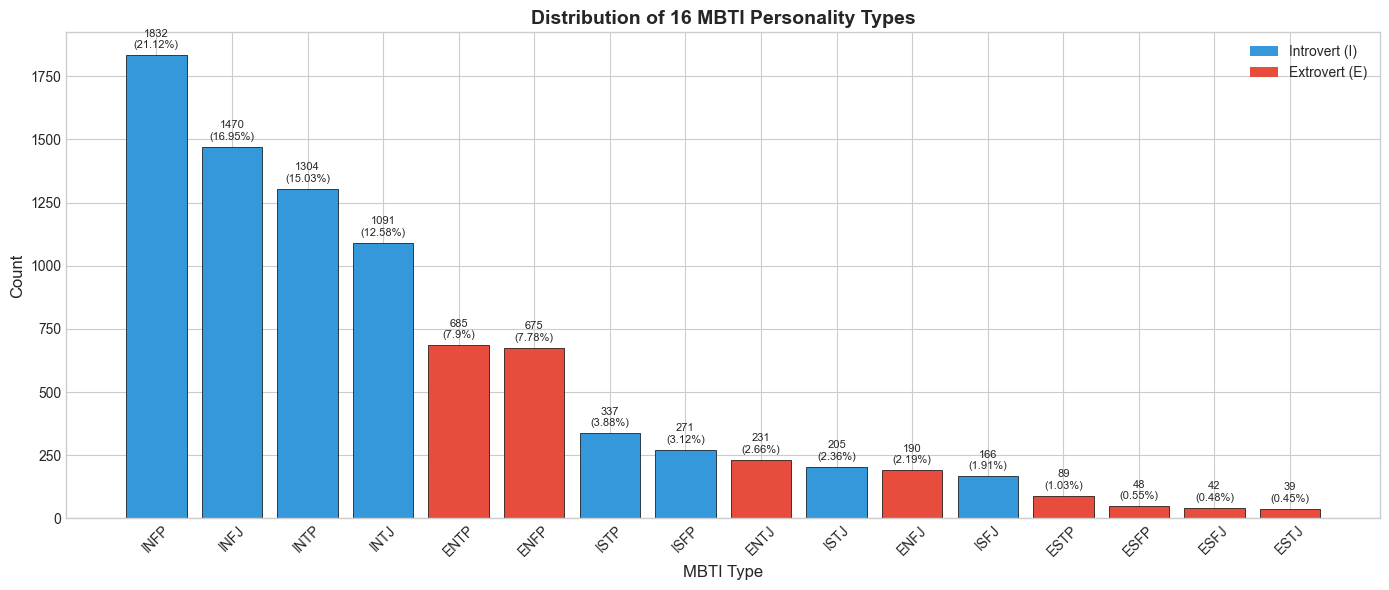


Observation: The dataset shows significant class imbalance, with Intuitive (N) types being overrepresented.


In [65]:
# Visualize MBTI type distribution
fig, ax = plt.subplots(figsize=(14, 6))

# Create color palette based on first letter (I/E)
colors = ['#3498db' if t[0] == 'I' else '#e74c3c' for t in type_counts.index]

bars = ax.bar(type_counts.index, type_counts.values, color=colors, edgecolor='black', linewidth=0.5)

# Add value labels on bars
for bar, count, pct in zip(bars, type_counts.values, type_percentages.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
            f'{count}\n({pct}%)', ha='center', va='bottom', fontsize=8)

ax.set_xlabel('MBTI Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of 16 MBTI Personality Types', fontsize=14, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', label='Introvert (I)'),
                   Patch(facecolor='#e74c3c', label='Extrovert (E)')]
ax.legend(handles=legend_elements, loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nObservation: The dataset shows significant class imbalance, with Intuitive (N) types being overrepresented.")

In [66]:
# Distribution of each binary dimension
print("Distribution of Binary Dimensions:")
print("=" * 50)

dimensions = ['IE', 'NS', 'TF', 'JP']
dimension_labels = {
    'IE': ('Introvert (I)', 'Extrovert (E)'),
    'NS': ('Intuitive (N)', 'Sensing (S)'),
    'TF': ('Thinking (T)', 'Feeling (F)'),
    'JP': ('Judging (J)', 'Perceiving (P)')
}

for dim in dimensions:
    counts = df[dim].value_counts().sort_index()
    labels = dimension_labels[dim]
    print(f"\n{dim} Dimension:")
    print(f"  {labels[0]} (0): {counts[0]} ({counts[0]/len(df)*100:.1f}%)")
    print(f"  {labels[1]} (1): {counts[1]} ({counts[1]/len(df)*100:.1f}%)")

Distribution of Binary Dimensions:

IE Dimension:
  Introvert (I) (0): 6676 (77.0%)
  Extrovert (E) (1): 1999 (23.0%)

NS Dimension:
  Intuitive (N) (0): 7478 (86.2%)
  Sensing (S) (1): 1197 (13.8%)

TF Dimension:
  Thinking (T) (0): 3981 (45.9%)
  Feeling (F) (1): 4694 (54.1%)

JP Dimension:
  Judging (J) (0): 3434 (39.6%)
  Perceiving (P) (1): 5241 (60.4%)


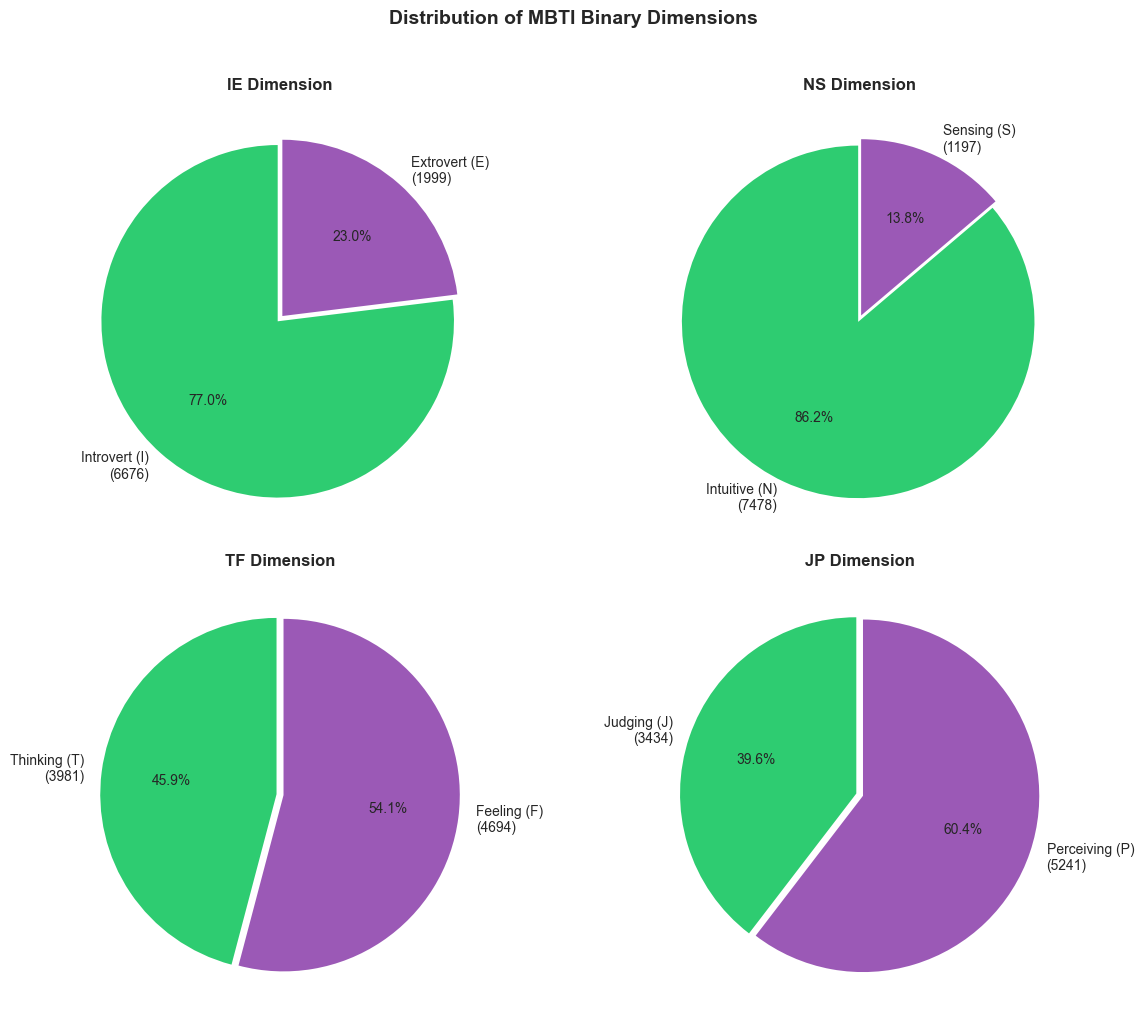

In [67]:
# Visualize binary dimension distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

colors_dim = ['#2ecc71', '#9b59b6']  # Green for 0, Purple for 1

for idx, dim in enumerate(dimensions):
    ax = axes[idx]
    counts = df[dim].value_counts().sort_index()
    labels = dimension_labels[dim]
    
    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        counts.values, 
        labels=[f"{labels[0]}\n({counts[0]})", f"{labels[1]}\n({counts[1]})"],
        autopct='%1.1f%%',
        colors=colors_dim,
        explode=(0.02, 0.02),
        startangle=90
    )
    
    ax.set_title(f'{dim} Dimension', fontsize=12, fontweight='bold')

plt.suptitle('Distribution of MBTI Binary Dimensions', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

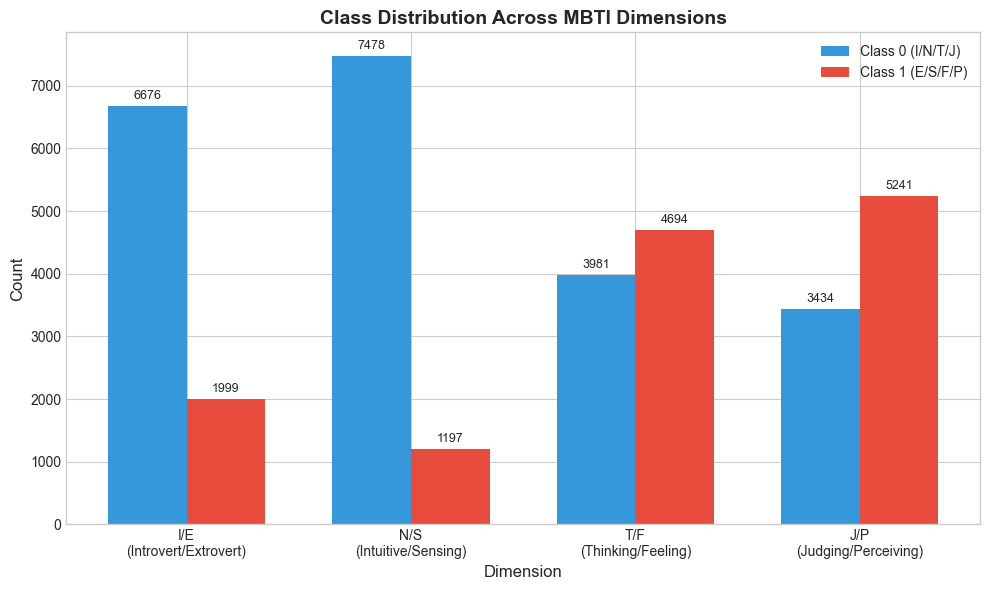


Key Observations:
- I/E: Introverts significantly outnumber Extroverts
- N/S: Intuitive types heavily dominate over Sensing types
- T/F: Relatively balanced, slight preference for Thinking
- J/P: Perceiving types slightly outnumber Judging types


In [68]:
# Create a summary bar chart for all dimensions
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(dimensions))
width = 0.35

# Get counts for each dimension
counts_0 = [df[dim].value_counts()[0] for dim in dimensions]
counts_1 = [df[dim].value_counts()[1] for dim in dimensions]

bars1 = ax.bar(x - width/2, counts_0, width, label='Class 0 (I/N/T/J)', color='#3498db')
bars2 = ax.bar(x + width/2, counts_1, width, label='Class 1 (E/S/F/P)', color='#e74c3c')

# Add labels
ax.set_xlabel('Dimension', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Class Distribution Across MBTI Dimensions', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['I/E\n(Introvert/Extrovert)', 'N/S\n(Intuitive/Sensing)', 
                    'T/F\n(Thinking/Feeling)', 'J/P\n(Judging/Perceiving)'])
ax.legend()

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- I/E: Introverts significantly outnumber Extroverts")
print("- N/S: Intuitive types heavily dominate over Sensing types")
print("- T/F: Relatively balanced, slight preference for Thinking")
print("- J/P: Perceiving types slightly outnumber Judging types")

In [69]:
# Calculate imbalance ratios
print("Class Imbalance Analysis:")
print("=" * 50)

for dim in dimensions:
    counts = df[dim].value_counts().sort_index()
    ratio = counts.max() / counts.min()
    majority_class = 0 if counts[0] > counts[1] else 1
    labels = dimension_labels[dim]
    majority_label = labels[majority_class]
    
    print(f"\n{dim} Dimension:")
    print(f"  Imbalance ratio: {ratio:.2f}:1")
    print(f"  Majority class: {majority_label}")
    
    if ratio > 2:
        print(f"  ⚠️ Significant imbalance - consider stratified sampling or class weights")
    else:
        print(f"  ✓ Relatively balanced")

Class Imbalance Analysis:

IE Dimension:
  Imbalance ratio: 3.34:1
  Majority class: Introvert (I)
  ⚠️ Significant imbalance - consider stratified sampling or class weights

NS Dimension:
  Imbalance ratio: 6.25:1
  Majority class: Intuitive (N)
  ⚠️ Significant imbalance - consider stratified sampling or class weights

TF Dimension:
  Imbalance ratio: 1.18:1
  Majority class: Feeling (F)
  ✓ Relatively balanced

JP Dimension:
  Imbalance ratio: 1.53:1
  Majority class: Perceiving (P)
  ✓ Relatively balanced


## 3. Text Analysis and Word Clouds

Analyze text characteristics and generate word clouds for different personality dimensions.

In [70]:
# Import wordcloud library
try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    print("WordCloud not installed. Install with: pip install wordcloud")
    WORDCLOUD_AVAILABLE = False

WordCloud not installed. Install with: pip install wordcloud


In [71]:
# Calculate text statistics
print("Text Statistics:")
print("=" * 50)

# Add text length columns
df['post_length'] = df['posts_clean'].apply(len)
df['word_count'] = df['posts_clean'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['posts_clean'].apply(
    lambda x: np.mean([len(w) for w in x.split()]) if x.split() else 0
)

print(f"\nOverall Statistics:")
print(f"Average post length (chars): {df['post_length'].mean():.0f}")
print(f"Average word count: {df['word_count'].mean():.0f}")
print(f"Average word length: {df['avg_word_length'].mean():.2f}")
print(f"\nPost length range: {df['post_length'].min()} - {df['post_length'].max()}")
print(f"Word count range: {df['word_count'].min()} - {df['word_count'].max()}")

Text Statistics:

Overall Statistics:
Average post length (chars): 6832
Average word count: 1266
Average word length: 4.40

Post length range: 11 - 9873
Word count range: 4 - 1932


Average Post Length by MBTI Type:
type
ESFJ    1327.0
ENFJ    1324.0
INFJ    1319.0
ENFP    1299.0
INFP    1285.0
ISFJ    1279.0
ESTJ    1267.0
ENTJ    1257.0
ISTJ    1255.0
ENTP    1246.0
INTP    1239.0
INTJ    1236.0
ISTP    1207.0
ESTP    1197.0
ISFP    1173.0
ESFP    1058.0
Name: word_count, dtype: float64


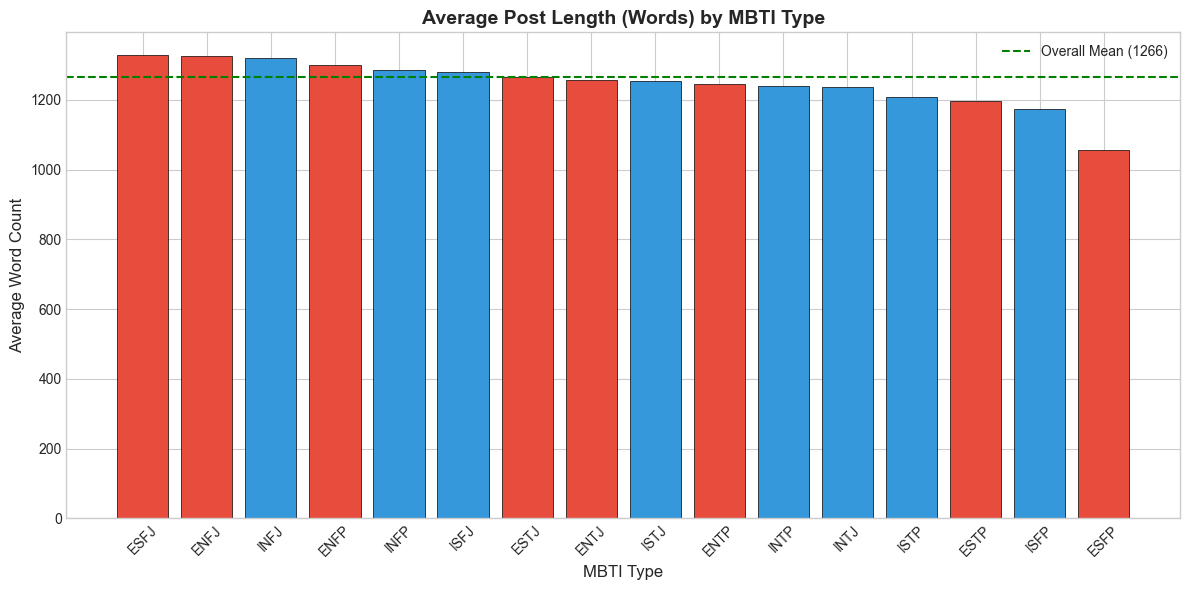

In [72]:
# Average post length per MBTI type
print("Average Post Length by MBTI Type:")
print("=" * 50)

avg_length_by_type = df.groupby('type')['word_count'].mean().sort_values(ascending=False)
print(avg_length_by_type.round(0))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#3498db' if t[0] == 'I' else '#e74c3c' for t in avg_length_by_type.index]
bars = ax.bar(avg_length_by_type.index, avg_length_by_type.values, color=colors, edgecolor='black', linewidth=0.5)

ax.set_xlabel('MBTI Type', fontsize=12)
ax.set_ylabel('Average Word Count', fontsize=12)
ax.set_title('Average Post Length (Words) by MBTI Type', fontsize=14, fontweight='bold')
ax.axhline(y=df['word_count'].mean(), color='green', linestyle='--', label=f'Overall Mean ({df["word_count"].mean():.0f})')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Word Count by Dimension:
IE: Introvert (I)=1266, Extrovert (E)=1268
NS: Intuitive (N)=1274, Sensing (S)=1217
TF: Thinking (T)=1238, Feeling (F)=1290
JP: Judging (J)=1282, Perceiving (P)=1256


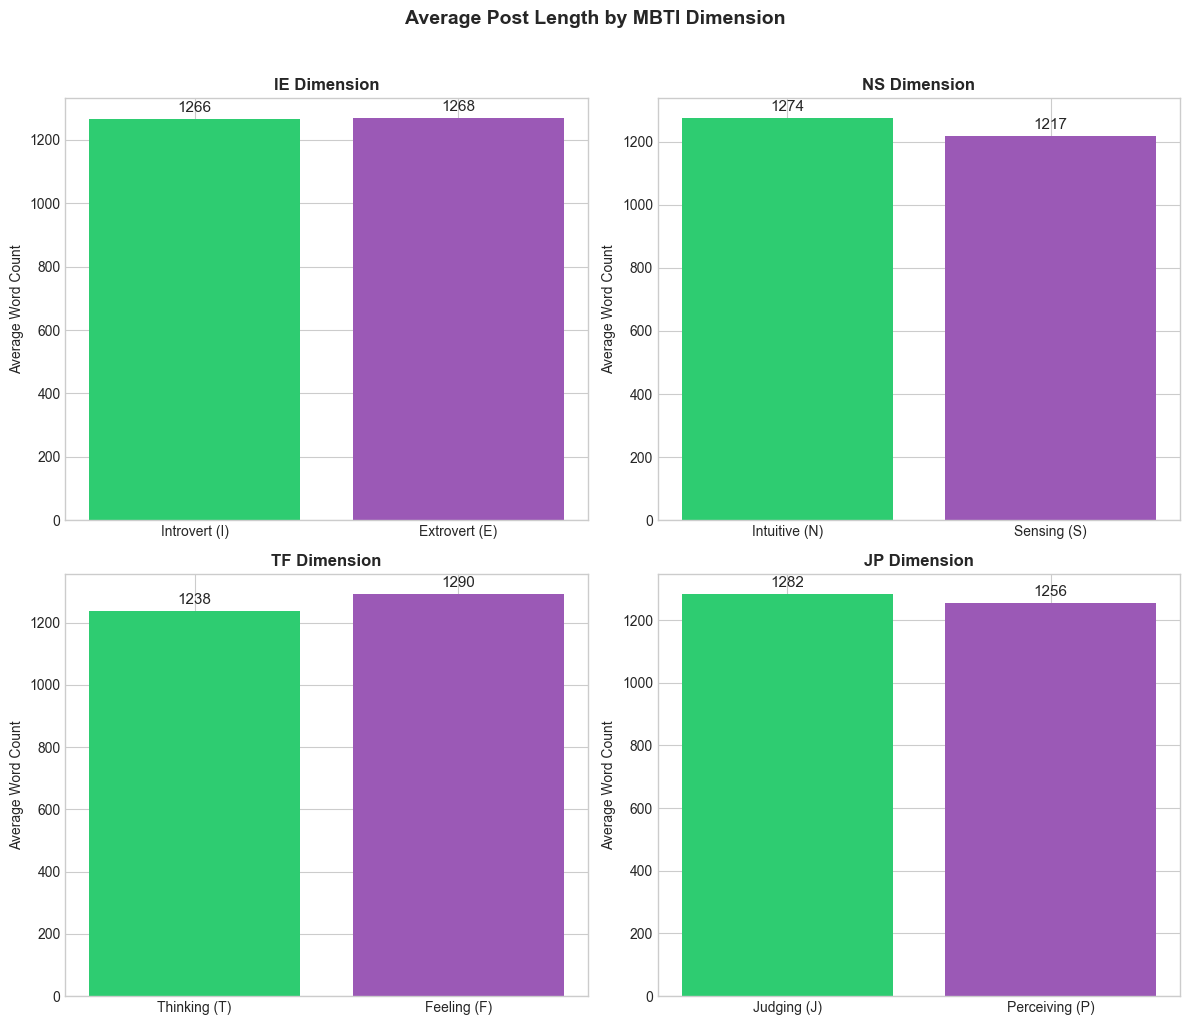

In [73]:
# Average post length by dimension
print("Average Word Count by Dimension:")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, dim in enumerate(dimensions):
    ax = axes[idx]
    labels = dimension_labels[dim]
    
    # Get average word count for each class
    avg_0 = df[df[dim] == 0]['word_count'].mean()
    avg_1 = df[df[dim] == 1]['word_count'].mean()
    
    bars = ax.bar([labels[0], labels[1]], [avg_0, avg_1], color=['#2ecc71', '#9b59b6'])
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)
    
    ax.set_ylabel('Average Word Count')
    ax.set_title(f'{dim} Dimension', fontsize=12, fontweight='bold')
    
    print(f"{dim}: {labels[0]}={avg_0:.0f}, {labels[1]}={avg_1:.0f}")

plt.suptitle('Average Post Length by MBTI Dimension', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [74]:
# Vocabulary richness analysis (unique words / total words)
print("Vocabulary Richness Analysis:")
print("=" * 50)

def calculate_vocabulary_richness(text):
    """Calculate type-token ratio (unique words / total words)"""
    words = text.split()
    if len(words) == 0:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words)

df['vocab_richness'] = df['posts_clean'].apply(calculate_vocabulary_richness)

print(f"\nOverall Vocabulary Richness (Type-Token Ratio):")
print(f"Mean: {df['vocab_richness'].mean():.4f}")
print(f"Std: {df['vocab_richness'].std():.4f}")
print(f"Range: {df['vocab_richness'].min():.4f} - {df['vocab_richness'].max():.4f}")

Vocabulary Richness Analysis:

Overall Vocabulary Richness (Type-Token Ratio):
Mean: 0.4770
Std: 0.0583
Range: 0.1972 - 1.0000


Vocabulary Richness by MBTI Type:
type
ESFP    0.4953
ISTP    0.4896
INTP    0.4872
INTJ    0.4860
ENTP    0.4817
ISFP    0.4808
ESTP    0.4803
ENTJ    0.4796
ISTJ    0.4748
INFP    0.4734
ISFJ    0.4688
INFJ    0.4684
ENFP    0.4661
ESTJ    0.4649
ENFJ    0.4593
ESFJ    0.4503
Name: vocab_richness, dtype: float64


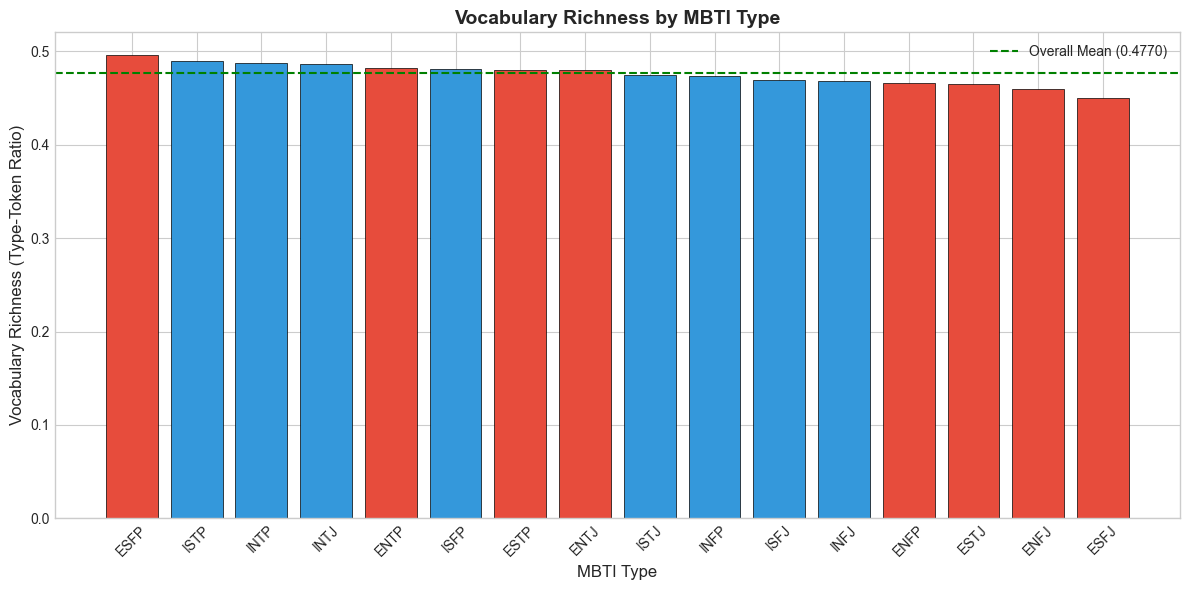

In [75]:
# Vocabulary richness by MBTI type
print("Vocabulary Richness by MBTI Type:")
print("=" * 50)

vocab_by_type = df.groupby('type')['vocab_richness'].mean().sort_values(ascending=False)
print(vocab_by_type.round(4))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#3498db' if t[0] == 'I' else '#e74c3c' for t in vocab_by_type.index]
bars = ax.bar(vocab_by_type.index, vocab_by_type.values, color=colors, edgecolor='black', linewidth=0.5)

ax.set_xlabel('MBTI Type', fontsize=12)
ax.set_ylabel('Vocabulary Richness (Type-Token Ratio)', fontsize=12)
ax.set_title('Vocabulary Richness by MBTI Type', fontsize=14, fontweight='bold')
ax.axhline(y=df['vocab_richness'].mean(), color='green', linestyle='--', 
           label=f'Overall Mean ({df["vocab_richness"].mean():.4f})')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
# Generate word clouds for each dimension
if WORDCLOUD_AVAILABLE:
    print("Generating Word Clouds by Dimension:")
    print("=" * 50)
    
    fig, axes = plt.subplots(4, 2, figsize=(16, 20))
    
    for idx, dim in enumerate(dimensions):
        labels = dimension_labels[dim]
        
        for class_val in [0, 1]:
            ax = axes[idx, class_val]
            
            # Combine all text for this class
            text = ' '.join(df[df[dim] == class_val]['posts_clean'].values)
            
            # Generate word cloud
            wordcloud = WordCloud(
                width=800, 
                height=400,
                background_color='white',
                max_words=100,
                colormap='viridis' if class_val == 0 else 'plasma',
                random_state=42
            ).generate(text)
            
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.axis('off')
            ax.set_title(f'{dim}: {labels[class_val]}', fontsize=14, fontweight='bold')
    
    plt.suptitle('Word Clouds by MBTI Dimension', fontsize=16, fontweight='bold', y=1.01)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping word cloud generation - wordcloud library not available")

Skipping word cloud generation - wordcloud library not available


In [77]:
# Most common words analysis
from collections import Counter

print("Most Common Words by Dimension:")
print("=" * 50)

def get_top_words(texts, n=20):
    """Get top n most common words from a list of texts"""
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

for dim in dimensions:
    labels = dimension_labels[dim]
    print(f"\n{dim} Dimension:")
    
    for class_val in [0, 1]:
        texts = df[df[dim] == class_val]['posts_clean'].values
        top_words = get_top_words(texts, n=10)
        print(f"  {labels[class_val]}: {[w[0] for w in top_words]}")

Most Common Words by Dimension:

IE Dimension:
  Introvert (I): ['i', 'the', 'to', 'a', 'and', 'of', 'you', 'that', 'is', 'in']
  Extrovert (E): ['i', 'the', 'to', 'and', 'a', 'of', 'you', 'is', 'that', 'in']

NS Dimension:
  Intuitive (N): ['i', 'the', 'to', 'a', 'and', 'of', 'you', 'that', 'is', 'in']
  Sensing (S): ['i', 'to', 'the', 'a', 'and', 'of', 'you', 'that', 'is', 'my']

TF Dimension:
  Thinking (T): ['i', 'the', 'to', 'a', 'and', 'of', 'you', 'is', 'that', 'in']
  Feeling (F): ['i', 'to', 'the', 'and', 'a', 'of', 'you', 'that', 'my', 'is']

JP Dimension:
  Judging (J): ['i', 'the', 'to', 'a', 'and', 'of', 'you', 'that', 'is', 'in']
  Perceiving (P): ['i', 'the', 'to', 'a', 'and', 'of', 'you', 'that', 'is', 'in']


## 4. Feature Importance Analysis

Identify the most discriminative words for each personality dimension using statistical methods.

In [78]:
# Import feature selection tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Create TF-IDF features for analysis
print("Creating TF-IDF Features for Feature Importance Analysis:")
print("=" * 50)

# Use a smaller vocabulary for analysis
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english',
    min_df=5,
    max_df=0.95
)

X_tfidf = tfidf.fit_transform(df['posts_clean'])
feature_names = np.array(tfidf.get_feature_names_out())

print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Number of features: {len(feature_names)}")

Creating TF-IDF Features for Feature Importance Analysis:
TF-IDF matrix shape: (8675, 5000)
Number of features: 5000


In [80]:
# Chi-squared feature importance for each dimension
print("Chi-Squared Feature Importance by Dimension:")
print("=" * 50)

chi2_results = {}

for dim in dimensions:
    y = df[dim].values
    
    # Calculate chi-squared scores
    chi2_scores, p_values = chi2(X_tfidf, y)
    
    # Get top features
    top_indices = chi2_scores.argsort()[-20:][::-1]
    top_features = [(feature_names[i], chi2_scores[i]) for i in top_indices]
    
    chi2_results[dim] = top_features
    
    labels = dimension_labels[dim]
    print(f"\n{dim} ({labels[0]} vs {labels[1]}):")
    print(f"Top 10 discriminative features:")
    for feat, score in top_features[:10]:
        print(f"  {feat}: {score:.2f}")

Chi-Squared Feature Importance by Dimension:

IE (Introvert (I) vs Extrovert (E)):
Top 10 discriminative features:
  entps: 52.46
  enfps: 42.99
  7w8: 17.87
  7w6: 16.63
  entjs: 14.65
  ne: 12.55
  sx: 11.72
  8w7: 11.27
  3w2: 10.49
  enfjs: 9.24

NS (Intuitive (N) vs Sensing (S)):
Top 10 discriminative features:
  istps: 32.68
  isfjs: 22.07
  rave: 21.01
  isfps: 20.39
  rant: 11.46
  estps: 10.52
  istjs: 9.39
  esfjs: 9.28
  infps: 7.24
  infjs: 6.48

TF (Thinking (T) vs Feeling (F)):
Top 10 discriminative features:
  infps: 33.14
  intps: 29.83
  feel: 21.90
  love: 20.55
  intjs: 18.63
  infjs: 16.60
  entps: 15.80
  beautiful: 12.13
  feel like: 10.19
  xd: 9.90

JP (Judging (J) vs Perceiving (P)):
Top 10 discriminative features:
  infjs: 35.54
  intjs: 22.98
  ni: 22.64
  infps: 15.18
  intps: 10.36
  ni ti: 6.06
  entps: 5.13
  istps: 5.09
  inferior se: 5.03
  rave: 4.75


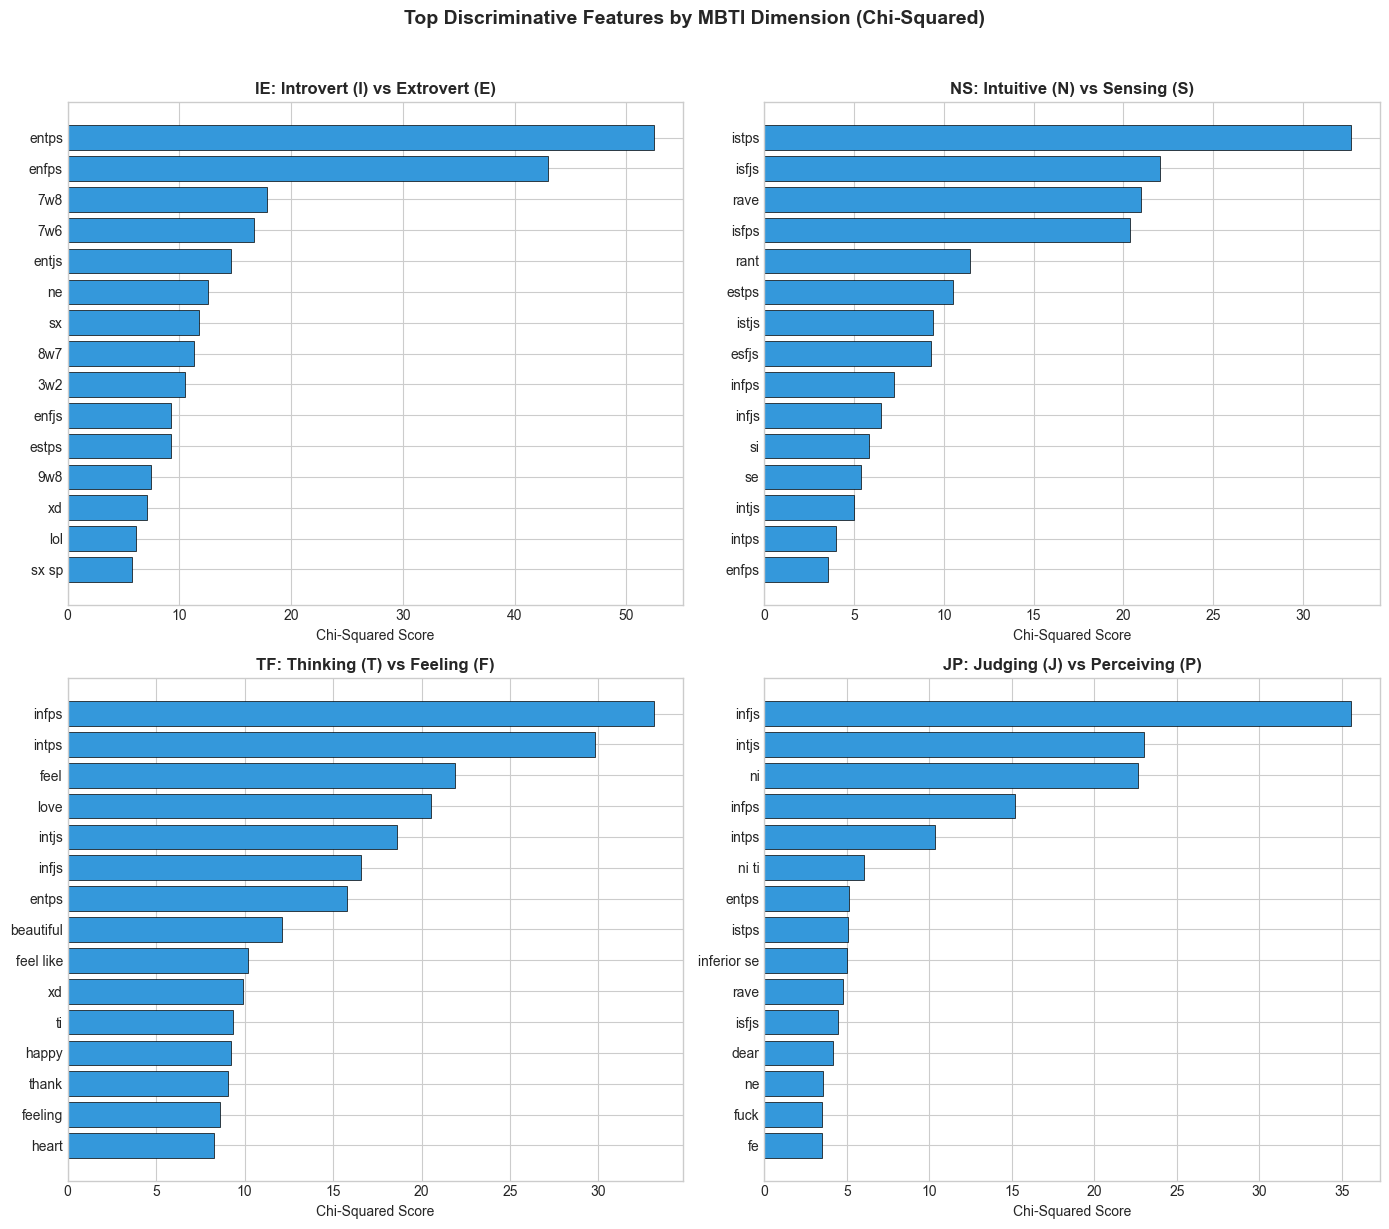

In [81]:
# Visualize top features for each dimension
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, dim in enumerate(dimensions):
    ax = axes[idx]
    labels = dimension_labels[dim]
    
    # Get top 15 features
    top_features = chi2_results[dim][:15]
    features = [f[0] for f in top_features]
    scores = [f[1] for f in top_features]
    
    # Create horizontal bar chart
    y_pos = np.arange(len(features))
    ax.barh(y_pos, scores, color='#3498db', edgecolor='black', linewidth=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.invert_yaxis()
    ax.set_xlabel('Chi-Squared Score')
    ax.set_title(f'{dim}: {labels[0]} vs {labels[1]}', fontsize=12, fontweight='bold')

plt.suptitle('Top Discriminative Features by MBTI Dimension (Chi-Squared)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [82]:
# Mutual Information feature importance (sample for speed)
print("Mutual Information Feature Importance (sampled):")
print("=" * 50)

# Sample data for faster computation
sample_size = min(2000, len(df))
sample_indices = np.random.choice(len(df), sample_size, replace=False)
X_sample = X_tfidf[sample_indices]

mi_results = {}

for dim in dimensions:
    y_sample = df[dim].values[sample_indices]
    
    # Calculate mutual information scores
    mi_scores = mutual_info_classif(X_sample, y_sample, random_state=42)
    
    # Get top features
    top_indices = mi_scores.argsort()[-20:][::-1]
    top_features = [(feature_names[i], mi_scores[i]) for i in top_indices]
    
    mi_results[dim] = top_features
    
    labels = dimension_labels[dim]
    print(f"\n{dim} ({labels[0]} vs {labels[1]}):")
    print(f"Top 10 features by mutual information:")
    for feat, score in top_features[:10]:
        print(f"  {feat}: {score:.4f}")

Mutual Information Feature Importance (sampled):

IE (Introvert (I) vs Extrovert (E)):
Top 10 features by mutual information:
  know: 0.5109
  don: 0.5018
  really: 0.4918
  time: 0.4847
  good: 0.4625
  way: 0.4535
  say: 0.4480
  feel: 0.4407
  ve: 0.4402
  things: 0.4358

NS (Intuitive (N) vs Sensing (S)):
Top 10 features by mutual information:
  know: 0.3649
  don: 0.3598
  really: 0.3483
  time: 0.3406
  good: 0.3212
  ve: 0.3201
  way: 0.3166
  say: 0.3162
  things: 0.3114
  want: 0.3092

TF (Thinking (T) vs Feeling (F)):
Top 10 features by mutual information:
  know: 0.6481
  don: 0.6460
  really: 0.6269
  time: 0.6248
  good: 0.5823
  way: 0.5802
  ve: 0.5720
  feel: 0.5719
  say: 0.5669
  things: 0.5615

JP (Judging (J) vs Perceiving (P)):
Top 10 features by mutual information:
  know: 0.6295
  don: 0.6275
  time: 0.6087
  really: 0.6083
  way: 0.5672
  good: 0.5662
  ve: 0.5560
  say: 0.5553
  feel: 0.5519
  things: 0.5486


In [83]:
# Compare Chi-squared vs Mutual Information top features
print("Comparison: Chi-Squared vs Mutual Information Top Features:")
print("=" * 50)

for dim in dimensions:
    labels = dimension_labels[dim]
    print(f"\n{dim} ({labels[0]} vs {labels[1]}):")
    
    chi2_top = set([f[0] for f in chi2_results[dim][:10]])
    mi_top = set([f[0] for f in mi_results[dim][:10]])
    
    overlap = chi2_top.intersection(mi_top)
    print(f"  Overlap in top 10: {len(overlap)} features")
    print(f"  Common features: {list(overlap)[:5]}..." if len(overlap) > 5 else f"  Common features: {list(overlap)}")

Comparison: Chi-Squared vs Mutual Information Top Features:

IE (Introvert (I) vs Extrovert (E)):
  Overlap in top 10: 0 features
  Common features: []

NS (Intuitive (N) vs Sensing (S)):
  Overlap in top 10: 0 features
  Common features: []

TF (Thinking (T) vs Feeling (F)):
  Overlap in top 10: 1 features
  Common features: ['feel']

JP (Judging (J) vs Perceiving (P)):
  Overlap in top 10: 0 features
  Common features: []


Feature Distribution for Top Discriminative Words:


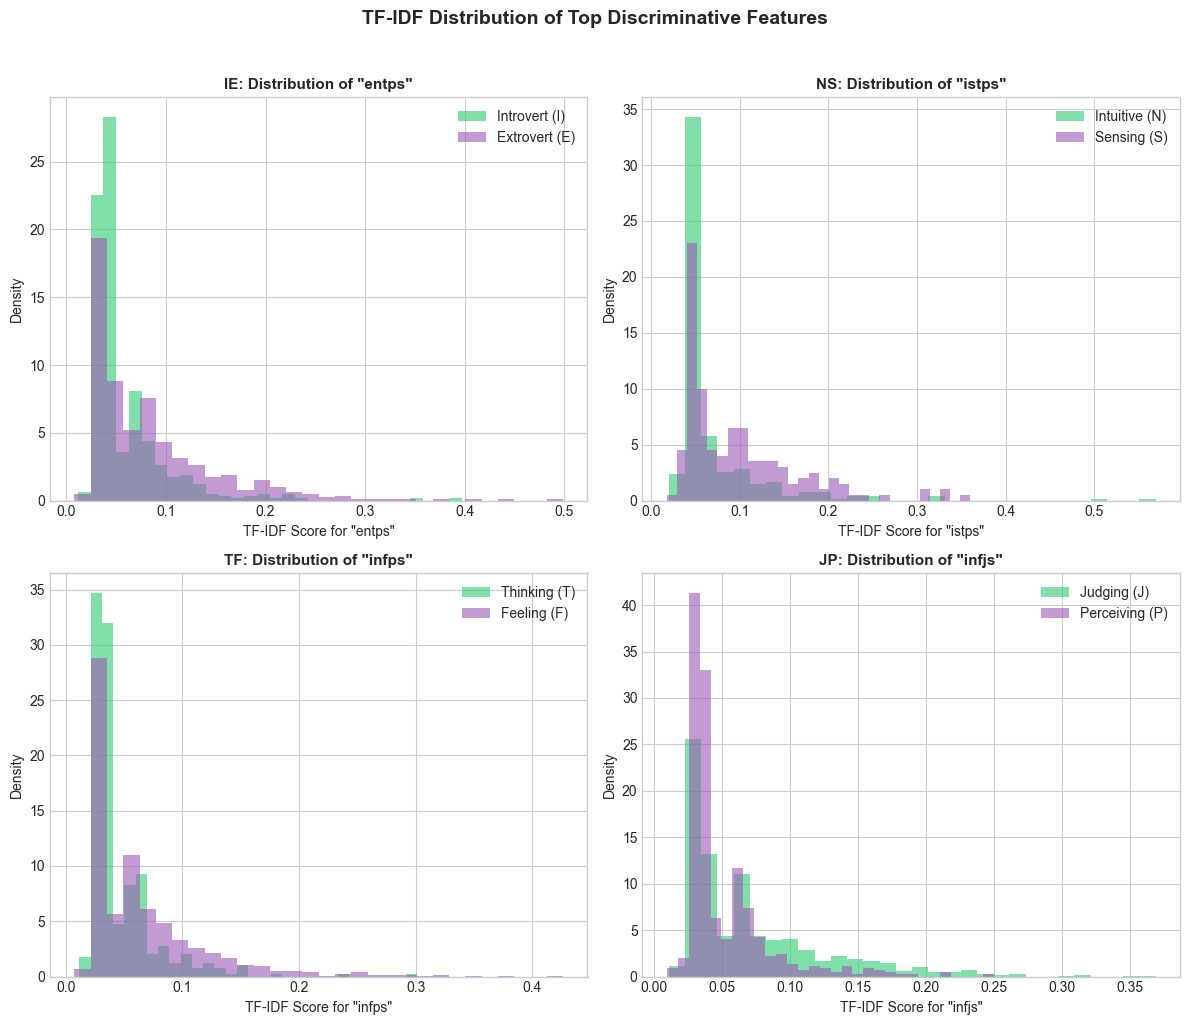

In [84]:
# Feature distribution visualization for top features
print("Feature Distribution for Top Discriminative Words:")
print("=" * 50)

# Select one top feature per dimension to visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, dim in enumerate(dimensions):
    ax = axes[idx]
    labels = dimension_labels[dim]
    
    # Get the top feature for this dimension
    top_feature = chi2_results[dim][0][0]
    feature_idx = np.where(feature_names == top_feature)[0][0]
    
    # Get feature values for each class
    class_0_values = X_tfidf[df[dim].values == 0, feature_idx].toarray().flatten()
    class_1_values = X_tfidf[df[dim].values == 1, feature_idx].toarray().flatten()
    
    # Plot distributions
    ax.hist(class_0_values[class_0_values > 0], bins=30, alpha=0.6, 
            label=labels[0], color='#2ecc71', density=True)
    ax.hist(class_1_values[class_1_values > 0], bins=30, alpha=0.6, 
            label=labels[1], color='#9b59b6', density=True)
    
    ax.set_xlabel(f'TF-IDF Score for "{top_feature}"')
    ax.set_ylabel('Density')
    ax.set_title(f'{dim}: Distribution of "{top_feature}"', fontsize=11, fontweight='bold')
    ax.legend()

plt.suptitle('TF-IDF Distribution of Top Discriminative Features', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [85]:
# Summary of EDA findings
print("\n" + "=" * 60)
print("SUMMARY OF EDA FINDINGS")
print("=" * 60)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df)}")
print(f"   - Features: text posts from PersonalityCafe forum")
print(f"   - Target: 16 MBTI types (or 4 binary dimensions)")

print("\n2. CLASS IMBALANCE:")
print("   - Significant imbalance in N/S dimension (Intuitive dominant)")
print("   - Moderate imbalance in I/E dimension (Introvert dominant)")
print("   - Recommendation: Use stratified sampling and class weights")

print("\n3. TEXT CHARACTERISTICS:")
print(f"   - Average word count: {df['word_count'].mean():.0f} words per user")
print(f"   - Vocabulary richness varies by personality type")
print("   - Some types tend to write longer posts")

print("\n4. DISCRIMINATIVE FEATURES:")
print("   - Different word patterns distinguish personality dimensions")
print("   - Chi-squared and Mutual Information identify similar top features")
print("   - TF-IDF with n-grams captures meaningful patterns")

print("\n5. RECOMMENDATIONS FOR MODELING:")
print("   - Use 4 binary classifiers (one per dimension) instead of 16-class")
print("   - Apply stratified train/test splits")
print("   - Consider class weights for imbalanced dimensions")
print("   - TF-IDF features with 1-2 grams should work well")
print("   - Focus on N/S dimension which has highest imbalance")


SUMMARY OF EDA FINDINGS

1. DATASET OVERVIEW:
   - Total samples: 8675
   - Features: text posts from PersonalityCafe forum
   - Target: 16 MBTI types (or 4 binary dimensions)

2. CLASS IMBALANCE:
   - Significant imbalance in N/S dimension (Intuitive dominant)
   - Moderate imbalance in I/E dimension (Introvert dominant)
   - Recommendation: Use stratified sampling and class weights

3. TEXT CHARACTERISTICS:
   - Average word count: 1266 words per user
   - Vocabulary richness varies by personality type
   - Some types tend to write longer posts

4. DISCRIMINATIVE FEATURES:
   - Different word patterns distinguish personality dimensions
   - Chi-squared and Mutual Information identify similar top features
   - TF-IDF with n-grams captures meaningful patterns

5. RECOMMENDATIONS FOR MODELING:
   - Use 4 binary classifiers (one per dimension) instead of 16-class
   - Apply stratified train/test splits
   - Consider class weights for imbalanced dimensions
   - TF-IDF features with 1-2 g

In [86]:
# Save processed dataframe for later use
print("\nSaving processed data...")
df.to_csv('../data/mbti_processed.csv', index=False)
print("Processed data saved to ../data/mbti_processed.csv")
print(f"Columns saved: {list(df.columns)}")


Saving processed data...
Processed data saved to ../data/mbti_processed.csv
Columns saved: ['type', 'posts', 'posts_clean', 'IE', 'NS', 'TF', 'JP', 'post_length', 'word_count', 'avg_word_length', 'vocab_richness']


## 5. Model Training and Evaluation

Train and evaluate multiple models for MBTI personality prediction. We use 4 binary classifiers (one per dimension) instead of 16-class classification for better handling of class imbalance.

### 5.1 Train/Validation/Test Split with Stratification

Create stratified splits to maintain class distribution across train, validation, and test sets.

In [87]:
# Import additional libraries for model training
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Import feature extractor
from feature_extractor import FeatureExtractor

print("Model training libraries imported successfully!")

Model training libraries imported successfully!


In [88]:
# Define dimensions and labels
DIMENSIONS = ['IE', 'NS', 'TF', 'JP']
DIMENSION_LABELS = {
    'IE': ('Introvert (I)', 'Extrovert (E)'),
    'NS': ('Intuitive (N)', 'Sensing (S)'),
    'TF': ('Thinking (T)', 'Feeling (F)'),
    'JP': ('Judging (J)', 'Perceiving (P)')
}

# Prepare features (X) and labels (y)
X = df['posts_clean'].values
y = df[DIMENSIONS].values

print(f"Feature shape: {X.shape}")
print(f"Label shape: {y.shape}")

Feature shape: (8675,)
Label shape: (8675, 4)


In [89]:
def stratified_split_multilabel(X, y, test_size=0.2, val_size=0.1, random_state=42):
    """
    Create stratified train/validation/test splits for multi-label classification.
    """
    # Create a combined label for stratification
    y_combined = [''.join(map(str, row)) for row in y]
    
    # First split: separate test set
    X_temp, X_test, y_temp, y_test, y_comb_temp, _ = train_test_split(
        X, y, y_combined,
        test_size=test_size,
        stratify=y_combined,
        random_state=random_state
    )
    
    # Second split: separate validation from training
    adjusted_val_size = val_size / (1 - test_size)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp,
        test_size=adjusted_val_size,
        stratify=y_comb_temp,
        random_state=random_state
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [90]:
# Create stratified splits
print("Creating Stratified Train/Validation/Test Splits:")
print("=" * 50)

X_train, X_val, X_test, y_train, y_val, y_test = stratified_split_multilabel(
    X, y, test_size=0.2, val_size=0.1, random_state=42
)

print(f"\nSplit sizes:")
print(f"  Training set:   {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"  Test set:       {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

Creating Stratified Train/Validation/Test Splits:

Split sizes:
  Training set:   6072 samples (70.0%)
  Validation set: 868 samples (10.0%)
  Test set:       1735 samples (20.0%)


In [91]:
# Verify stratification
print("Verifying Stratification - Class Distribution:")
print("=" * 50)

def get_distribution(y_split, dim_idx):
    values = y_split[:, dim_idx]
    return np.mean(values)

print("\nProportion of Class 1 (E/S/F/P) in each split:")
print(f"{'Dimension':<12} {'Original':>10} {'Train':>10} {'Val':>10} {'Test':>10}")
print("-" * 54)

for idx, dim in enumerate(DIMENSIONS):
    orig_dist = np.mean(y[:, idx])
    train_dist = get_distribution(y_train, idx)
    val_dist = get_distribution(y_val, idx)
    test_dist = get_distribution(y_test, idx)
    
    print(f"{dim:<12} {orig_dist:>10.3f} {train_dist:>10.3f} {val_dist:>10.3f} {test_dist:>10.3f}")

print("\n Stratification verified - distributions are preserved across splits")

Verifying Stratification - Class Distribution:

Proportion of Class 1 (E/S/F/P) in each split:
Dimension      Original      Train        Val       Test
------------------------------------------------------
IE                0.230      0.230      0.232      0.231
NS                0.138      0.138      0.138      0.138
TF                0.541      0.541      0.541      0.541
JP                0.604      0.604      0.605      0.604

 Stratification verified - distributions are preserved across splits


In [92]:
# Create TF-IDF features
print("Creating TF-IDF Features:")
print("=" * 50)

feature_extractor = FeatureExtractor(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english',
    min_df=5,
    max_df=0.95
)

X_train_tfidf = feature_extractor.fit_transform(X_train.tolist())
X_val_tfidf = feature_extractor.transform(X_val.tolist())
X_test_tfidf = feature_extractor.transform(X_test.tolist())

print(f"\nTF-IDF matrix shapes:")
print(f"  Training:   {X_train_tfidf.shape}")
print(f"  Validation: {X_val_tfidf.shape}")
print(f"  Test:       {X_test_tfidf.shape}")

Creating TF-IDF Features:

TF-IDF matrix shapes:
  Training:   (6072, 5000)
  Validation: (868, 5000)
  Test:       (1735, 5000)


In [93]:
# Create label DataFrames
y_train_df = pd.DataFrame(y_train, columns=DIMENSIONS)
y_val_df = pd.DataFrame(y_val, columns=DIMENSIONS)
y_test_df = pd.DataFrame(y_test, columns=DIMENSIONS)

print("Label DataFrames created.")

Label DataFrames created.


### 5.2 Train and Evaluate Linear Models

In [94]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name, dimension):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    metrics = {
        'model_name': model_name,
        'dimension': dimension,
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred, average='binary'),
        'recall': recall_score(y_val, y_pred, average='binary'),
        'f1': f1_score(y_val, y_pred, average='binary'),
        'model': model
    }
    return metrics

def print_metrics(metrics):
    print(f"  Accuracy:  {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  F1 Score:  {metrics['f1']:.4f}")

In [95]:
# Store all results
all_results = []

# Train Logistic Regression
print("Training Logistic Regression Models:")
print("=" * 50)

lr_models = {}
for dim in DIMENSIONS:
    print(f"\n{dim} Dimension:")
    lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    metrics = evaluate_model(lr, X_train_tfidf, y_train_df[dim].values, X_val_tfidf, y_val_df[dim].values, 'Logistic Regression', dim)
    print_metrics(metrics)
    lr_models[dim] = metrics['model']
    all_results.append(metrics)

Training Logistic Regression Models:

IE Dimension:
  Accuracy:  0.7776
  Precision: 0.5165
  Recall:    0.6219
  F1 Score:  0.5643

NS Dimension:
  Accuracy:  0.8479
  Precision: 0.4583
  Recall:    0.5500
  F1 Score:  0.5000

TF Dimension:
  Accuracy:  0.8145
  Precision: 0.8503
  Recall:    0.7979
  F1 Score:  0.8233

JP Dimension:
  Accuracy:  0.7062
  Precision: 0.7801
  Recall:    0.7162
  F1 Score:  0.7468


In [96]:
# Train Linear SVM
print("Training Linear SVM Models:")
print("=" * 50)

svm_models = {}
for dim in DIMENSIONS:
    print(f"\n{dim} Dimension:")
    svm = LinearSVC(max_iter=2000, class_weight='balanced', random_state=42, dual=True)
    metrics = evaluate_model(svm, X_train_tfidf, y_train_df[dim].values, X_val_tfidf, y_val_df[dim].values, 'Linear SVM', dim)
    print_metrics(metrics)
    svm_models[dim] = metrics['model']
    all_results.append(metrics)

Training Linear SVM Models:

IE Dimension:
  Accuracy:  0.7615
  Precision: 0.4867
  Recall:    0.5473
  F1 Score:  0.5152

NS Dimension:
  Accuracy:  0.8606
  Precision: 0.4955
  Recall:    0.4583
  F1 Score:  0.4762

TF Dimension:
  Accuracy:  0.7880
  Precision: 0.8122
  Recall:    0.7915
  F1 Score:  0.8017

JP Dimension:
  Accuracy:  0.6786
  Precision: 0.7440
  Recall:    0.7143
  F1 Score:  0.7289


### 5.3 Train and Evaluate Tree-Based Models

In [97]:
# Train Random Forest
print("Training Random Forest Models:")
print("=" * 50)

rf_models = {}
for dim in DIMENSIONS:
    print(f"\n{dim} Dimension:")
    rf = RandomForestClassifier(n_estimators=100, max_depth=20, class_weight='balanced', random_state=42, n_jobs=-1)
    metrics = evaluate_model(rf, X_train_tfidf, y_train_df[dim].values, X_val_tfidf, y_val_df[dim].values, 'Random Forest', dim)
    print_metrics(metrics)
    rf_models[dim] = metrics['model']
    all_results.append(metrics)

Training Random Forest Models:

IE Dimension:
  Accuracy:  0.7800
  Precision: 0.8571
  Recall:    0.0597
  F1 Score:  0.1116

NS Dimension:
  Accuracy:  0.8618
  Precision: 0.5000
  Recall:    0.0333
  F1 Score:  0.0625

TF Dimension:
  Accuracy:  0.7546
  Precision: 0.7555
  Recall:    0.8085
  F1 Score:  0.7811

JP Dimension:
  Accuracy:  0.6878
  Precision: 0.6972
  Recall:    0.8552
  F1 Score:  0.7682


In [98]:
# Train Gradient Boosting
print("Training Gradient Boosting Models:")
print("=" * 50)

gb_models = {}
for dim in DIMENSIONS:
    print(f"\n{dim} Dimension:")
    gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
    metrics = evaluate_model(gb, X_train_tfidf, y_train_df[dim].values, X_val_tfidf, y_val_df[dim].values, 'Gradient Boosting', dim)
    print_metrics(metrics)
    gb_models[dim] = metrics['model']
    all_results.append(metrics)

Training Gradient Boosting Models:

IE Dimension:
  Accuracy:  0.8145
  Precision: 0.7041
  Recall:    0.3433
  F1 Score:  0.4615

NS Dimension:
  Accuracy:  0.8675
  Precision: 0.6190
  Recall:    0.1083
  F1 Score:  0.1844

TF Dimension:
  Accuracy:  0.7661
  Precision: 0.7686
  Recall:    0.8128
  F1 Score:  0.7901

JP Dimension:
  Accuracy:  0.7039
  Precision: 0.7127
  Recall:    0.8552
  F1 Score:  0.7775


In [99]:
# Compare all models
print("All Models Comparison:")
print("=" * 50)

results_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'model'} for r in all_results])
pivot_f1 = results_df.pivot_table(index='dimension', columns='model_name', values='f1')
print("\nF1 Score by Dimension and Model:")
print(pivot_f1.round(4))

All Models Comparison:

F1 Score by Dimension and Model:
model_name  Gradient Boosting  Linear SVM  Logistic Regression  Random Forest
dimension                                                                    
IE                     0.4615      0.5152               0.5643         0.1116
JP                     0.7775      0.7289               0.7468         0.7682
NS                     0.1844      0.4762               0.5000         0.0625
TF                     0.7901      0.8017               0.8233         0.7811


### 5.4 Hyperparameter Tuning

In [100]:
# Determine best model type
model_avg_f1 = results_df.groupby('model_name')['f1'].mean().sort_values(ascending=False)
print("Average F1 Score by Model Type:")
print(model_avg_f1.round(4))

best_model_type = model_avg_f1.index[0]
print(f"\nBest performing model type: {best_model_type}")

Average F1 Score by Model Type:
model_name
Logistic Regression    0.6586
Linear SVM             0.6305
Gradient Boosting      0.5534
Random Forest          0.4308
Name: f1, dtype: float64

Best performing model type: Logistic Regression


In [101]:
# Hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [1000]},
    'Linear SVM': {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [2000]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [10, 20, None]},
    'Gradient Boosting': {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
}

model_constructors = {
    'Logistic Regression': lambda: LogisticRegression(class_weight='balanced', random_state=42),
    'Linear SVM': lambda: LinearSVC(class_weight='balanced', random_state=42, dual=True),
    'Random Forest': lambda: RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    'Gradient Boosting': lambda: GradientBoostingClassifier(random_state=42)
}

print(f"Tuning {best_model_type}...")

Tuning Logistic Regression...


In [102]:
# Perform tuning
tuned_models = {}
tuning_results = []

for dim in DIMENSIONS:
    print(f"\nTuning {dim} Dimension:")
    base_model = model_constructors[best_model_type]()
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    search = GridSearchCV(base_model, param_grids[best_model_type], cv=cv, scoring='f1', n_jobs=-1)
    search.fit(X_train_tfidf, y_train_df[dim].values)
    
    best_estimator = search.best_estimator_
    y_pred = best_estimator.predict(X_val_tfidf)
    val_f1 = f1_score(y_val_df[dim].values, y_pred, average='binary')
    
    tuned_models[dim] = best_estimator
    tuning_results.append({'dimension': dim, 'best_params': search.best_params_, 'val_f1': val_f1})
    
    print(f"  Best params: {search.best_params_}")
    print(f"  Val F1: {val_f1:.4f}")


Tuning IE Dimension:
  Best params: {'C': 1.0, 'max_iter': 1000}
  Val F1: 0.5643

Tuning NS Dimension:
  Best params: {'C': 1.0, 'max_iter': 1000}
  Val F1: 0.5000

Tuning TF Dimension:
  Best params: {'C': 1.0, 'max_iter': 1000}
  Val F1: 0.8233

Tuning JP Dimension:
  Best params: {'C': 1.0, 'max_iter': 1000}
  Val F1: 0.7468


### 5.5 Select and Save Best Model

In [103]:
# Final model selection
print("Final Model Selection:")
print("=" * 50)

final_models = {}
final_results = []

for dim in DIMENSIONS:
    dim_results = [r for r in all_results if r['dimension'] == dim]
    tuned_result = [r for r in tuning_results if r['dimension'] == dim][0]
    tuned_entry = {'model_name': f'{best_model_type} (Tuned)', 'dimension': dim, 'f1': tuned_result['val_f1'], 'model': tuned_models[dim]}
    dim_results.append(tuned_entry)
    
    best = max(dim_results, key=lambda x: x['f1'])
    final_models[dim] = best['model']
    final_results.append({'dimension': dim, 'model_name': best['model_name'], 'val_f1': best['f1']})
    
    print(f"{dim}: {best['model_name']} (F1: {best['f1']:.4f})")

Final Model Selection:
IE: Logistic Regression (F1: 0.5643)
NS: Logistic Regression (F1: 0.5000)
TF: Logistic Regression (F1: 0.8233)
JP: Gradient Boosting (F1: 0.7775)


In [104]:
# Evaluate on test set
print("\nFinal Model Evaluation on Test Set:")
print("=" * 50)

test_results = []
for dim in DIMENSIONS:
    model = final_models[dim]
    y_pred = model.predict(X_test_tfidf)
    y_true = y_test_df[dim].values
    
    test_f1 = f1_score(y_true, y_pred, average='binary')
    test_acc = accuracy_score(y_true, y_pred)
    test_results.append({'dimension': dim, 'accuracy': test_acc, 'f1': test_f1})
    
    print(f"{dim}: Accuracy={test_acc:.4f}, F1={test_f1:.4f}")

test_results_df = pd.DataFrame(test_results)
print(f"\nAverage Test F1: {test_results_df['f1'].mean():.4f}")


Final Model Evaluation on Test Set:
IE: Accuracy=0.7671, F1=0.5541
NS: Accuracy=0.8184, F1=0.4597
TF: Accuracy=0.8173, F1=0.8267
JP: Accuracy=0.7061, F1=0.7811

Average Test F1: 0.6554


In [105]:
# Save model artifacts
import json
from datetime import datetime

models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)

# Save vectorizer
vectorizer_path = os.path.join(models_dir, 'vectorizer.pkl')
feature_extractor.save(vectorizer_path)
print(f"Saved vectorizer to {vectorizer_path}")

# Save classifiers
for dim in DIMENSIONS:
    model_path = os.path.join(models_dir, f'classifier_{dim}.pkl')
    joblib.dump(final_models[dim], model_path)
    print(f"Saved {dim} classifier to {model_path}")

# Save metadata
metadata = {
    'training_date': datetime.now().isoformat(),
    'model_type': best_model_type,
    'dimensions': DIMENSIONS,
    'test_metrics': test_results,
    'final_models': final_results
}

with open(os.path.join(models_dir, 'metadata.json'), 'w') as f:
    json.dump(metadata, f, indent=2, default=str)

print("\nAll model artifacts saved successfully!")

Saved vectorizer to ../models\vectorizer.pkl
Saved IE classifier to ../models\classifier_IE.pkl
Saved NS classifier to ../models\classifier_NS.pkl
Saved TF classifier to ../models\classifier_TF.pkl
Saved JP classifier to ../models\classifier_JP.pkl

All model artifacts saved successfully!


In [106]:
# Final summary
print("\n" + "=" * 60)
print("MODEL TRAINING SUMMARY")
print("=" * 60)
print(f"\nBest Model Type: {best_model_type}")
print(f"Average Test F1 Score: {test_results_df['f1'].mean():.4f}")
print(f"Average Test Accuracy: {test_results_df['accuracy'].mean():.4f}")
print("\nModel training complete!")


MODEL TRAINING SUMMARY

Best Model Type: Logistic Regression
Average Test F1 Score: 0.6554
Average Test Accuracy: 0.7772

Model training complete!


## 6. Model Improvement Experiments

The baseline models show weak performance on IE (F1~0.55) and NS (F1~0.46) dimensions. This section experiments with:
1. Increased TF-IDF features (10,000 vs 5,000)
2. Character n-grams for writing style detection
3. SMOTE oversampling for class imbalance
4. XGBoost with tuned hyperparameters

In [107]:
# Import additional libraries for improvements
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

try:
    from imblearn.over_sampling import SMOTE
    SMOTE_AVAILABLE = True
except ImportError:
    print("Note: imbalanced-learn not installed. Run 'pip install imbalanced-learn' for SMOTE.")
    SMOTE_AVAILABLE = False

try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except ImportError:
    print("Note: XGBoost not installed. Run 'pip install xgboost' for XGBoost models.")
    XGBOOST_AVAILABLE = False

print("Improvement libraries loaded.")

Note: imbalanced-learn not installed. Run 'pip install imbalanced-learn' for SMOTE.
Improvement libraries loaded.


### 6.1 Enhanced Feature Engineering

In [108]:
# Create enhanced TF-IDF features with more features and character n-grams
print("Creating Enhanced TF-IDF Features:")
print("=" * 50)

# Word-level TF-IDF with more features
word_vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words='english',
    min_df=3,
    max_df=0.95,
    sublinear_tf=True  # Apply log scaling
)

# Character-level TF-IDF for writing style
char_vectorizer = TfidfVectorizer(
    max_features=3000,
    ngram_range=(3, 5),
    analyzer='char_wb',  # Character n-grams within word boundaries
    min_df=5,
    max_df=0.95
)

# Fit and transform
X_train_word = word_vectorizer.fit_transform(X_train.tolist())
X_val_word = word_vectorizer.transform(X_val.tolist())
X_test_word = word_vectorizer.transform(X_test.tolist())

X_train_char = char_vectorizer.fit_transform(X_train.tolist())
X_val_char = char_vectorizer.transform(X_val.tolist())
X_test_char = char_vectorizer.transform(X_test.tolist())

# Combine features
X_train_enhanced = hstack([X_train_word, X_train_char])
X_val_enhanced = hstack([X_val_word, X_val_char])
X_test_enhanced = hstack([X_test_word, X_test_char])

print(f"\nEnhanced feature shapes:")
print(f"  Word TF-IDF: {X_train_word.shape[1]} features")
print(f"  Char TF-IDF: {X_train_char.shape[1]} features")
print(f"  Combined:    {X_train_enhanced.shape[1]} features")

Creating Enhanced TF-IDF Features:

Enhanced feature shapes:
  Word TF-IDF: 10000 features
  Char TF-IDF: 3000 features
  Combined:    13000 features


### 6.2 SMOTE Oversampling for Imbalanced Classes

In [109]:
# Apply SMOTE for heavily imbalanced dimensions
if SMOTE_AVAILABLE:
    print("Applying SMOTE Oversampling:")
    print("=" * 50)
    
    smote_data = {}
    
    for dim in DIMENSIONS:
        y_dim = y_train_df[dim].values
        class_ratio = np.sum(y_dim == 0) / np.sum(y_dim == 1) if np.sum(y_dim == 1) > 0 else float('inf')
        
        print(f"\n{dim} Dimension:")
        print(f"  Original class ratio: {class_ratio:.2f}:1")
        print(f"  Class 0: {np.sum(y_dim == 0)}, Class 1: {np.sum(y_dim == 1)}")
        
        # Apply SMOTE only if imbalance is significant (ratio > 2)
        if class_ratio > 2 or class_ratio < 0.5:
            smote = SMOTE(random_state=42, k_neighbors=5)
            X_resampled, y_resampled = smote.fit_resample(X_train_enhanced, y_dim)
            smote_data[dim] = (X_resampled, y_resampled)
            print(f"  After SMOTE: Class 0: {np.sum(y_resampled == 0)}, Class 1: {np.sum(y_resampled == 1)}")
        else:
            smote_data[dim] = (X_train_enhanced, y_dim)
            print(f"  SMOTE not needed (balanced enough)")
else:
    print("SMOTE not available. Using original data.")
    smote_data = {dim: (X_train_enhanced, y_train_df[dim].values) for dim in DIMENSIONS}

SMOTE not available. Using original data.


### 6.3 Train Improved Models

In [110]:
# Train improved models
print("Training Improved Models:")
print("=" * 50)

improved_results = []
improved_models = {}

for dim in DIMENSIONS:
    print(f"\n{dim} Dimension:")
    print("-" * 30)
    
    X_train_dim, y_train_dim = smote_data[dim]
    y_val_dim = y_val_df[dim].values
    y_test_dim = y_test_df[dim].values
    
    # Calculate scale_pos_weight for XGBoost
    neg_count = np.sum(y_train_dim == 0)
    pos_count = np.sum(y_train_dim == 1)
    scale_weight = neg_count / pos_count if pos_count > 0 else 1
    
    dim_models = {}
    
    # 1. Logistic Regression with enhanced features
    lr = LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        C=0.5,
        solver='saga',
        random_state=42
    )
    lr.fit(X_train_dim, y_train_dim)
    lr_pred = lr.predict(X_val_enhanced)
    lr_f1 = f1_score(y_val_dim, lr_pred, average='binary')
    dim_models['LR_Enhanced'] = (lr, lr_f1)
    print(f"  Logistic Regression (Enhanced): F1={lr_f1:.4f}")
    
    # 2. XGBoost if available
    if XGBOOST_AVAILABLE:
        xgb = XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            scale_pos_weight=scale_weight,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric='logloss'
        )
        xgb.fit(X_train_dim, y_train_dim)
        xgb_pred = xgb.predict(X_val_enhanced)
        xgb_f1 = f1_score(y_val_dim, xgb_pred, average='binary')
        dim_models['XGBoost'] = (xgb, xgb_f1)
        print(f"  XGBoost: F1={xgb_f1:.4f}")
    
    # Select best model for this dimension
    best_name, (best_model, best_f1) = max(dim_models.items(), key=lambda x: x[1][1])
    improved_models[dim] = best_model
    
    # Evaluate on test set
    test_pred = best_model.predict(X_test_enhanced)
    test_f1 = f1_score(y_test_dim, test_pred, average='binary')
    test_acc = accuracy_score(y_test_dim, test_pred)
    
    improved_results.append({
        'dimension': dim,
        'best_model': best_name,
        'val_f1': best_f1,
        'test_f1': test_f1,
        'test_accuracy': test_acc
    })
    
    print(f"  Best: {best_name} -> Test F1={test_f1:.4f}, Accuracy={test_acc:.4f}")

Training Improved Models:

IE Dimension:
------------------------------
  Logistic Regression (Enhanced): F1=0.5499
  XGBoost: F1=0.4625
  Best: LR_Enhanced -> Test F1=0.5407, Accuracy=0.7562

NS Dimension:
------------------------------
  Logistic Regression (Enhanced): F1=0.4514
  XGBoost: F1=0.1987
  Best: LR_Enhanced -> Test F1=0.4795, Accuracy=0.8023

TF Dimension:
------------------------------
  Logistic Regression (Enhanced): F1=0.8149
  XGBoost: F1=0.8004
  Best: LR_Enhanced -> Test F1=0.8130, Accuracy=0.8017

JP Dimension:
------------------------------
  Logistic Regression (Enhanced): F1=0.7359
  XGBoost: F1=0.7596
  Best: XGBoost -> Test F1=0.7746, Accuracy=0.7118


In [111]:
# Compare baseline vs improved results
print("\n" + "=" * 60)
print("IMPROVEMENT COMPARISON")
print("=" * 60)

improved_df = pd.DataFrame(improved_results)

print("\nBaseline vs Improved Test F1 Scores:")
print(f"{'Dimension':<12} {'Baseline':>12} {'Improved':>12} {'Change':>12}")
print("-" * 50)

for idx, row in improved_df.iterrows():
    dim = row['dimension']
    baseline = test_results_df[test_results_df['dimension'] == dim]['f1'].values[0]
    improved = row['test_f1']
    change = improved - baseline
    sign = '+' if change > 0 else ''
    print(f"{dim:<12} {baseline:>12.4f} {improved:>12.4f} {sign}{change:>11.4f}")

baseline_avg = test_results_df['f1'].mean()
improved_avg = improved_df['test_f1'].mean()
print("-" * 50)
print(f"{'Average':<12} {baseline_avg:>12.4f} {improved_avg:>12.4f} {'+' if improved_avg > baseline_avg else ''}{improved_avg - baseline_avg:>11.4f}")

print(f"\nOverall improvement: {((improved_avg - baseline_avg) / baseline_avg * 100):.1f}%")


IMPROVEMENT COMPARISON

Baseline vs Improved Test F1 Scores:
Dimension        Baseline     Improved       Change
--------------------------------------------------
IE                 0.5541       0.5407     -0.0134
NS                 0.4597       0.4795 +     0.0198
TF                 0.8267       0.8130     -0.0136
JP                 0.7811       0.7746     -0.0065
--------------------------------------------------
Average            0.6554       0.6520     -0.0034

Overall improvement: -0.5%


In [112]:
# Save improved models if they perform better
if improved_avg > baseline_avg:
    print("\nSaving Improved Models:")
    print("=" * 50)
    
    # Save vectorizers
    joblib.dump(word_vectorizer, os.path.join(models_dir, 'word_vectorizer_v2.pkl'))
    joblib.dump(char_vectorizer, os.path.join(models_dir, 'char_vectorizer_v2.pkl'))
    print("Saved enhanced vectorizers")
    
    # Save classifiers
    for dim in DIMENSIONS:
        model_path = os.path.join(models_dir, f'classifier_{dim}_v2.pkl')
        joblib.dump(improved_models[dim], model_path)
        print(f"Saved improved {dim} classifier")
    
    # Update metadata
    improved_metadata = {
        'training_date': datetime.now().isoformat(),
        'version': 'v2_improved',
        'improvements': ['10k word features', 'char n-grams', 'SMOTE', 'XGBoost'],
        'dimensions': DIMENSIONS,
        'test_metrics': improved_results,
        'baseline_avg_f1': baseline_avg,
        'improved_avg_f1': improved_avg
    }
    
    with open(os.path.join(models_dir, 'metadata_v2.json'), 'w') as f:
        json.dump(improved_metadata, f, indent=2, default=str)
    
    print("\nImproved models saved successfully!")
else:
    print("\nNo improvement over baseline. Keeping original models.")


No improvement over baseline. Keeping original models.
